# Example notebook

In this notebook we shall demonstrate how pyro simulations can be set up and run in the notebook.

In [1]:
from pyro.pyro_sim import Pyro

First we need to set up our problem. To do this, we choose which solver we want to use (`advection`), which problem we want to solve (`smooth`) and the name of a parameter file we want to use (`inputs.smooth`). 

In [2]:
solver = "advection"
problem_name = "smooth"
param_file = "inputs.smooth"

Next, we need to create the `Pyro` object and initialize the problem.

In [3]:
pyro_sim = Pyro(solver)
pyro_sim.initialize_problem(problem_name, param_file)

pyro ...
initializing the smooth advection problem...


At this point, we can print out some of the problem properties.

In [4]:
print(pyro_sim)

Solver = advection
Problem = smooth
Simulation time = 0.0
Simulation step number = 0

Runtime Parameters
------------------
advection.limiter = 2
advection.u = 1.0
advection.v = 1.0
driver.cfl = 0.8
driver.fix_dt = -1.0
driver.init_tstep_factor = 1.0
driver.max_dt_change = 1e+33
driver.max_steps = 500
driver.tmax = 1.0
driver.verbose = 1.0
io.basename = smooth_
io.do_io = 1
io.dt_out = 0.2
io.n_out = 10000
mesh.nx = 32
mesh.ny = 32
mesh.xlboundary = periodic
mesh.xmax = 1.0
mesh.xmin = 0.0
mesh.xrboundary = periodic
mesh.ylboundary = periodic
mesh.ymax = 1.0
mesh.ymin = 0.0
mesh.yrboundary = periodic
particles.do_particles = 1
particles.n_particles = 100
particles.particle_generator = grid
vis.dovis = 1
vis.store_images = 0



We can also plot the initial data by calling `dovis` on the object's `sim` variable.

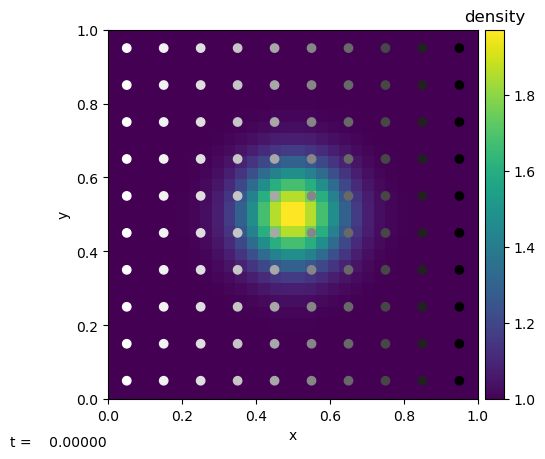

<Figure size 640x480 with 0 Axes>

In [5]:
pyro_sim.sim.dovis()

Let's evolve the problem by a single timestep by calling `single_step`. This will evolve the simulation and produce an updated plot of the data (unless the problem's `vis.dovis` parameter has been set to false). Let's try that a couple of times.

    1    0.02500    0.02500


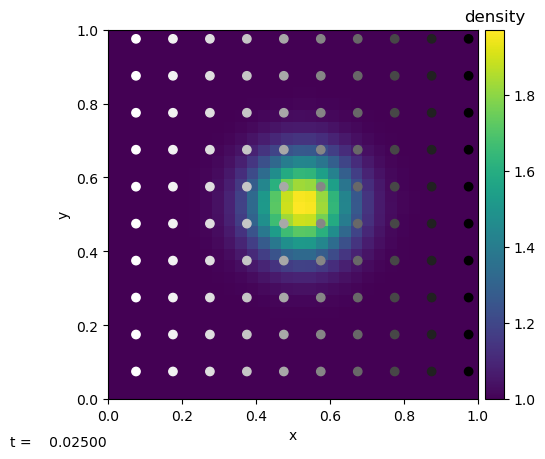

<Figure size 640x480 with 0 Axes>

In [6]:
pyro_sim.single_step()

    2    0.05000    0.02500


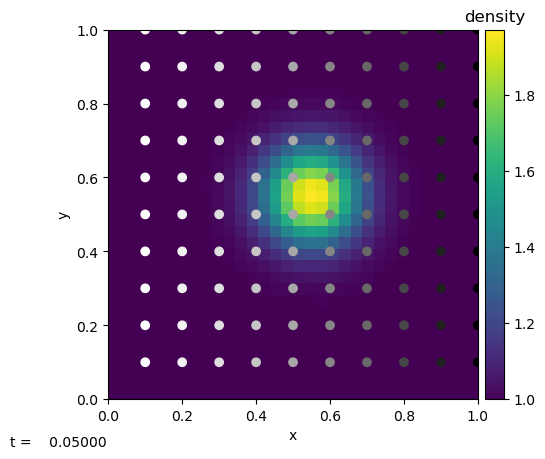

<Figure size 640x480 with 0 Axes>

In [7]:
pyro_sim.single_step()

Alternatively, we can run the entire simulation (i.e. run until the time reaches the `driver.tmax` parameter or the number of steps reaches `driver.max_steps`). Let's reinitialize the problem and try that. This time, we shall pass in the extra parameter `vis.dovis = False` in order to suppress plotting at each timestep. We'll also shrink down the number of gridpoints in each direction and turn off the particles.

In [8]:
# NBVAL_IGNORE_OUTPUT 
extra_parameters = {'vis.dovis': False, 'mesh.nx': 8, 'mesh.ny':8, 'particles.do_particles': False}
pyro_sim.initialize_problem(problem_name, param_file, inputs_dict=extra_parameters)
pyro_sim.run_sim()

initializing the smooth advection problem...
    1    0.10000    0.10000
    2    0.20000    0.10000
outputting...
    3    0.30000    0.10000
    4    0.40000    0.10000
outputting...
    5    0.50000    0.10000
    6    0.60000    0.10000
    7    0.70000    0.10000
outputting...
    8    0.80000    0.10000
    9    0.90000    0.10000
outputting...
   10    1.00000    0.10000
   11    1.00000    0.00000
outputting...
outputting...
vis:  0.38307738304138184
main:  0.06256771087646484


We can now plot the final data by calling `dovis` again

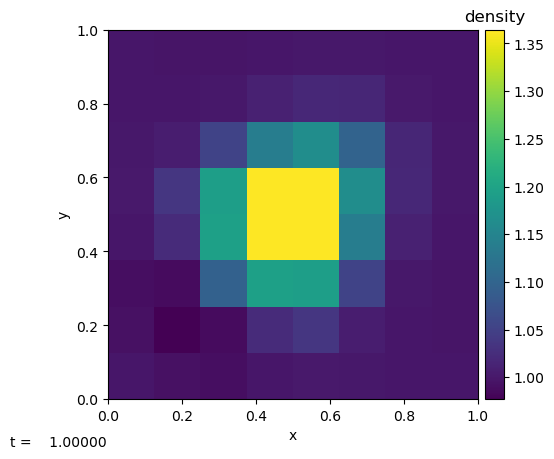

<Figure size 640x480 with 0 Axes>

In [9]:
pyro_sim.sim.dovis()

We can extract the simulation data using the `get_var` function. Let's do that for the density.

In [10]:
dens = pyro_sim.get_var("density")

In [11]:
# NBVAL_IGNORE_OUTPUT 
print(dens)

[[1.36456254 1.1670318  1.01964861 1.0019269  1.0034205  1.03779893
  1.19356852 1.36368295 1.36456254 1.1670318  1.01964861 1.0019269
  1.0034205  1.03779893 1.19356852 1.36368295]
 [1.1670318  1.1010689  1.01794261 1.00172162 1.00146403 1.00815036
  1.05467319 1.14089365 1.1670318  1.1010689  1.01794261 1.00172162
  1.00146403 1.00815036 1.05467319 1.14089365]
 [1.01964861 1.01794261 1.00386665 1.00034788 1.00015378 1.00017897
  1.00141073 1.01213761 1.01964861 1.01794261 1.00386665 1.00034788
  1.00015378 1.00017897 1.00141073 1.01213761]
 [1.0019269  1.00172162 1.00034788 1.00025512 1.00085108 0.99958517
  0.99836213 1.00032876 1.0019269  1.00172162 1.00034788 1.00025512
  1.00085108 0.99958517 0.99836213 1.00032876]
 [1.0034205  1.00146403 1.00015378 1.00085108 1.00036435 0.99369049
  0.99065988 1.00056788 1.0034205  1.00146403 1.00015378 1.00085108
  1.00036435 0.99369049 0.99065988 1.00056788]
 [1.03779893 1.00815036 1.00017897 0.99958517 0.99369049 0.97697494
  0.9889869  1.024

This can be printed in a slightly more human-readable format by using `pretty_print`

In [12]:
dens.pretty_print(show_ghost=False)

    1.0009   0.99959   0.99836    1.0003    1.0019    1.0017    1.0003    1.0003 
    1.0002    1.0002    1.0014    1.0121    1.0196    1.0179    1.0039    1.0003 
    1.0015    1.0082    1.0547    1.1409     1.167    1.1011    1.0179    1.0017 
    1.0034    1.0378    1.1936    1.3637    1.3646     1.167    1.0196    1.0019 
    1.0006    1.0246     1.198    1.3631    1.3637    1.1409    1.0121    1.0003 
   0.99066   0.98899    1.0969     1.198    1.1936    1.0547    1.0014   0.99836 
   0.99369   0.97697   0.98899    1.0246    1.0378    1.0082    1.0002   0.99959 
    1.0004   0.99369   0.99066    1.0006    1.0034    1.0015    1.0002    1.0009 

         ^ y
         |
         +---> x
        
